# Titanic - Machine Learning from Disaster
### Kaggle’s Competition

Project's goal: use machine learning to create a model that predicts which passengers survived the Titanic shipwreck.

Build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).

### Data Dictionary
![title](DataDictionary.png)

### Variable Notes
![title](VariableNotes.png)

### Carregando dados e exploração inicial

In [1]:
# Importando os módulos
import numpy as np
import pandas as pd
import matplotlib as mat
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Carregando o dataset
df = pd.read_csv("train.csv")

In [3]:
# Verificando o formato dos dados
df.shape

(891, 12)

In [4]:
#Verificando as primeiras linhas do dataset
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
# Verificando se existem valores nulos (resumo)
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
# Verificando registros que possuem NaNs
df[pd.isnull(df).any(axis=1)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [9]:
# Excluindo coluna Name
df.drop('Name',1, inplace = True)
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,male,26.0,0,0,111369,30.0000,C148,C


### Tratando missing values

In [10]:
# Definindo os valores substitutos
# Age: mediana, Cabin: 0 (significando "sem número"), Embarked: moda 
values = {'Age': df.Age.median(), 'Cabin': 0, 'Embarked': df.Embarked.mode()[0]}
values

{'Age': 28.0, 'Cabin': 0, 'Embarked': 'S'}

In [11]:
# Preenchendo missing values com os valores do dict values
df.fillna(value=values, inplace=True)

In [12]:
# Conferindo valores nulos
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

### Análise Exploratória

In [13]:
# Agrupar por sexo e calcular o tamanho de cada grupo que sobreviveu ou não
df.groupby('Sex')['Survived'].value_counts()

Sex     Survived
female  1           233
        0            81
male    0           468
        1           109
Name: Survived, dtype: int64

In [14]:
# Outra opção, acrescentando a média de idade
pd.DataFrame(df.groupby(['Sex','Survived'])['Age'].mean())

Age
Sex    Survived           
female 0         25.666667
       1         28.716738
male   0         30.783120
       1         27.382294

In [15]:
# Outra opção
df.groupby(['Sex','Survived']).agg({'Age': np.mean, 'PassengerId': np.size})

Age  PassengerId
Sex    Survived                        
female 0         25.666667           81
       1         28.716738          233
male   0         30.783120          468
       1         27.382294          109

In [16]:
# Trabalhando com DataFrame
a=pd.DataFrame(df.groupby('Sex')['Survived'].value_counts())
a

Survived
Sex    Survived          
female 1              233
       0               81
male   0              468
       1              109

In [17]:
# Lista de nomes do MultiIndex
a.index.names

FrozenList(['Sex', 'Survived'])

In [18]:
# Sobreviventes do sexo feminino
a.loc['female']

,Survived
Survived,
1,233
0,81


In [19]:
# Sobreviventes por sexo
# Busca sobreviventes (#1) no nível 1 do MultiIndex
a.xs(1, level=1)

,Survived
Sex,
female,233
male,109


In [20]:
# Não sobreviventes por sexo
# Busca não sobreviventes (#0) no nível 1 do MultiIndex
a.xs(0, level=1)

,Survived
Sex,
female,81
male,468


In [21]:
a.unstack()

Survived     
Survived        0    1
Sex                   
female         81  233
male          468  109

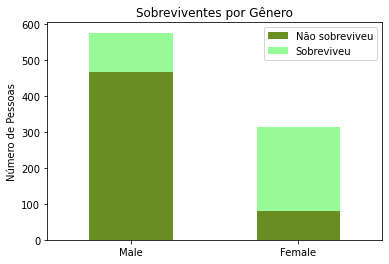

In [22]:
# Gráfico de sobreviventes por gênero em números absolutos
a.unstack().sort_index(ascending=False).plot(kind='bar', stacked=True, title='Sobreviventes por Gênero', \
                                            color={('Survived', 0): 'olivedrab', ('Survived', 1): 'palegreen'})
plt.xlabel("")
plt.ylabel("Número de Pessoas")
plt.xticks([0,1],['Male', 'Female'], rotation='horizontal')
plt.legend(["Não sobreviveu", "Sobreviveu"])
plt.show()

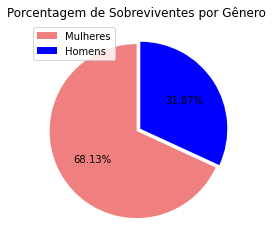

In [23]:
# Porcentagem de sobreviventes por gênero
ms = a.xs(1, level=1).loc['female'] / a.xs(1, level=1).sum() * 100
hs = 100 - ms
l = [float(ms.values) , float(hs.values)]
legenda = 'Mulheres','Homens'
explode = (0, 0.05)
cores=['lightcoral', 'b']
plt.pie(l, explode=explode, colors=cores, autopct='%1.2f%%', startangle=90)
plt.legend(legenda)
plt.title("Porcentagem de Sobreviventes por Gênero")
plt.show()

# A maioria (68,13%) dos sobreviventes são mulheres

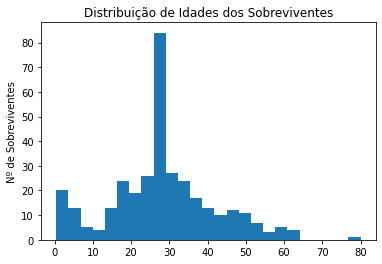

In [24]:
# Distribuição de idades dos sobreviventes
plt.hist(df[df['Survived']==1].Age, bins = 25)
plt.title('Distribuição de Idades dos Sobreviventes')
plt.ylabel('Nº de Sobreviventes')
plt.show()

In [25]:
# Idade de sobrevivente que mais se repete: 28 anos
df[df['Survived'] == 1].Age.mode()

0    28.0
dtype: float64

In [26]:
# Verificando registros de pessoas 70+ anos
df[df['Survived'] == 1].query('Age > 70')

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
630,631,1,1,male,80.0,0,0,27042,30.0,A23,S


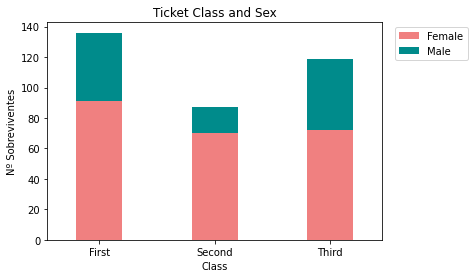

In [87]:
# Número de sobreviventes por classe
df1 = df[df['Survived'] == 1]
df1.groupby('Pclass')['Sex'].value_counts().unstack().plot(kind='bar', stacked = True,  width=0.4, \
                                                           color={'female': 'lightcoral', 'male': 'darkcyan'})
plt.title('Ticket Class and Sex')
plt.xticks([0, 1, 2], ['First', 'Second', 'Third'], rotation='horizontal')
plt.xlabel ('Class')
plt.ylabel ('Nº Sobreviventes')
plt.legend(['Female','Male'], ncol=1, loc='upper right', bbox_to_anchor = (1.27, 1))
plt.show()

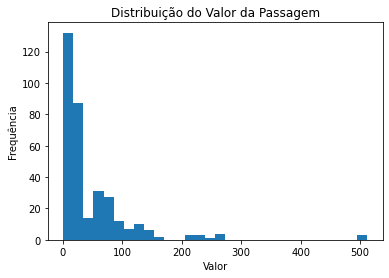

In [88]:
df[df['Survived'] == 1].Fare.plot.hist(bins=30)
plt.title('Distribuição do Valor da Passagem')
plt.xlabel('Valor')
plt.ylabel('Frequência')
plt.show()

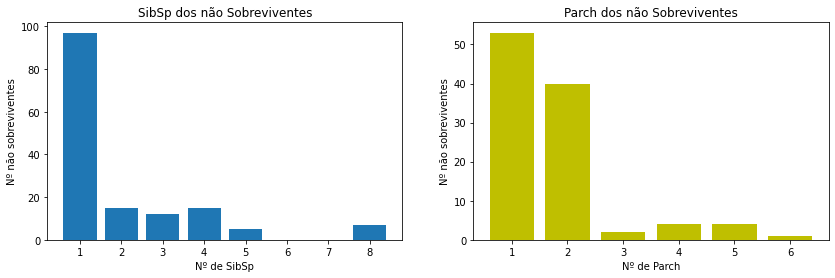

In [89]:
# Número de não sobreviventes que deixaram 1 ou + SibSp e Parch
fig1 = plt.figure(figsize=(14,4))

df2=df[df['Survived'] == 0]

ax1 = fig1.add_subplot (1,2,1)
ax1.bar(df2.query('SibSp >= 1').SibSp.value_counts().index, df2.query('SibSp >= 1').SibSp.value_counts().values)
ax1.set_title ('SibSp dos não Sobreviventes')
ax1.set_xlabel ('Nº de SibSp')
ax1.set_ylabel ('Nº não sobreviventes')

ax2 = fig1.add_subplot (1,2,2)
ax2.bar(df2.query('Parch >= 1').Parch.value_counts().index, df2.query('Parch >= 1').Parch.value_counts().values, color='y')
ax2.set_title ('Parch dos não Sobreviventes')
ax2.set_xlabel ('Nº de Parch')
ax2.set_ylabel ('Nº não sobreviventes')


plt.show()

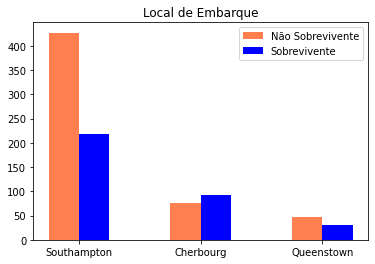

In [90]:
# Local de embarque dos sobreviventes e não sobreviventes
barWidth = 0.25
r1 = np.arange(len(df2.Embarked.value_counts()))
r2 = [x + barWidth for x in r1]

plt.bar(r1, df2.Embarked.value_counts().values, color='coral', width=barWidth, label='Não Sobrevivente' )
plt.bar(r2, df[df['Survived']==1].Embarked.value_counts().values, color='b', width=barWidth, label='Sobrevivente')
plt.xticks([r + barWidth/2 for r in range(len(df2.Embarked.value_counts().index))], \
           ['Southampton', 'Cherbourg', 'Queenstown'])
plt.title('Local de Embarque')
plt.legend()

plt.show()

In [91]:
# Visualizando a correlação em tabela
# Coeficiente de correlação: 
# +1  = forte correlação positiva
# 0   = não há correlação
# -1  = forte correlação negativa
df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.034212,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.064910,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.339898,0.083081,0.018443,-0.549500
Age,0.034212,-0.064910,-0.339898,1.000000,-0.233296,-0.172482,0.096688
SibSp,-0.057527,-0.035322,0.083081,-0.233296,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.172482,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096688,0.159651,0.216225,1.000000


In [92]:
# Identificando a correlação entre as variáveis
# Correlação não implica causalidade
def plot_corr(df, size=df.columns.shape[0]):
    corr = df.corr()    
    fig, ax = plt.subplots(figsize = (size, size))
    ax.matshow(corr)  
    plt.xticks(range(len(corr.columns)), corr.columns) 
    plt.yticks(range(len(corr.columns)), corr.columns)

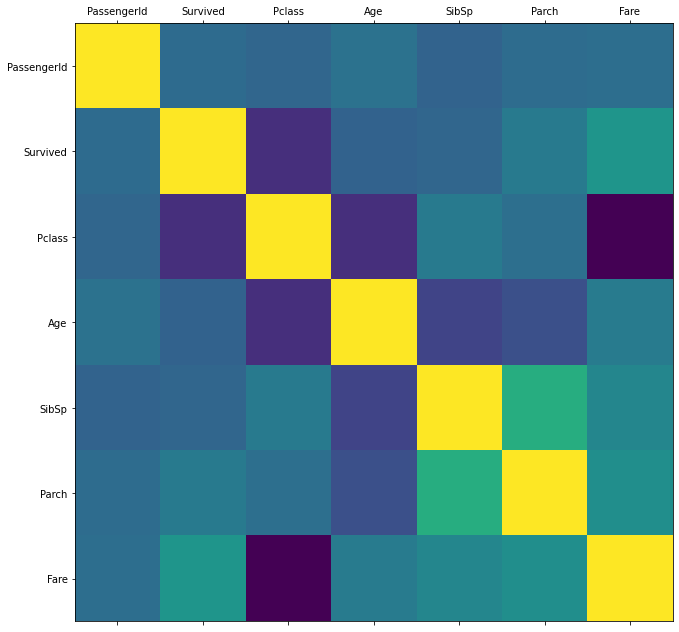

In [93]:
# Criando o gráfico
plot_corr(df)

In [94]:
# Verificando a correlação das variáveis com a coluna Survived
# Ordenando valores absolutos de forma decrescente
df.corr().Survived.abs().sort_values(ascending=False)

# Pclass e Fare são as variáveis que tem maior correlação
# Ambas as classes tem forte correlação entre si

Survived       1.000000
Pclass         0.338481
Fare           0.257307
Parch          0.081629
Age            0.064910
SibSp          0.035322
PassengerId    0.005007
Name: Survived, dtype: float64